In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install torch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch

In [3]:
# https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge?select=train.csv
raw = pd.read_csv("genomes_genetics.csv")

## Task
Given medical information about children who have genetic disorders predict genetic disorder subclass (genetic disorder can be defined by given subclass).

## Data overview

In [4]:
raw.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

### Data selection

In [6]:
raw.drop(["Patient Id",
          "Patient First Name",
          "Family Name",
          "Father's name",
          "Institute Name",
          "Location of Institute",
          "Test 1",
          "Test 2",
          "Test 3",
          "Test 4",
          "Test 5",
          "Symptom 1",
          "Symptom 2",
          "Symptom 3",
          "Symptom 4",
          "Symptom 5",
          "Parental consent",
        ], axis=1, inplace=True)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [8]:
raw.rename(columns={
                    "Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"
                    }, inplace=True)

In [ ]:
raw.nunique()

Patient_Age                        15
Genes_Mother_Side                   2
Inherited_Father                    2
Maternal_Gene                       2
Paternal_Gene                       2
Blood_Cell_mcL                  22083
Mother_Age                         34
Father_Age                         45
Status                              2
Respiratory_Rate_Breaths_Min        2
Heart_Rates_Min                     2
Follow_Up                           2
Gender                              3
Birth_Asphyxia                      4
Autopsy_Birth_Defect                3
Place_Birth                         2
Folic_Acid                          2
Maternal_Illness                    2
Radiation_Exposure                  4
Substance_Abuse                     4
Assisted_Conception                 2
History_Previous_Pregnancies        2
Previous_Abortion                   5
Birth_Defects                       2
White_Blood_Cell                17277
Blood_Test_Result                   4
Genetic_Diso

In [9]:
_numerical = list(raw.describe().columns)
for c in raw.columns:
    if(c not in _numerical):
        print(raw[c].value_counts())
        print()

Genes_Mother_Side
Yes    13143
No      8940
Name: count, dtype: int64

Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64

Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64

Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64

Status
Alive       11083
Deceased    11000
Name: count, dtype: int64

Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64

Heart_Rates_Min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64

Follow_Up
Low     10040
High     9877
Name: count, dtype: int64

Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64

Birth_Asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64

Autopsy_Birth_Defect
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64

Place_Birth
Institute    10073
Home          9886
Name: count, 

In [10]:
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("No record",np.NaN)
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("Not available",np.NaN)
raw["Autopsy_Birth_Defect"] = raw["Autopsy_Birth_Defect"].replace("None",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("Not applicable",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("-",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("Not applicable",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("-",np.NaN)

### Save cleared data

In [11]:
raw.to_csv('Disorders_dataset_cleared.zip',
            compression={'method':'zip', 'archive_name':'Disorders_dataset_cleared.csv'})

## Data analysis

In [13]:
data = pd.read_csv("Disorders_dataset_cleared.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   20656 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              21777 non-null  object 
 3   Maternal_Gene                 19273 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    16047 non-null  float64
 7   Father_Age                    16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19934 non-null  object 
 10  Heart_Rates_Min               19970 non-null  object 
 11  Follow_Up                     19917 non-null  object 
 12  Gender                        19910 non-null  object 
 13  B

In [14]:
numerical = list(data.describe().columns)
categorical = [c for c in data.columns if c not in numerical]

In [15]:
numerical

['Patient_Age',
 'Blood_Cell_mcL',
 'Mother_Age',
 'Father_Age',
 'Previous_Abortion',
 'White_Blood_Cell']

In [16]:
categorical

['Genes_Mother_Side',
 'Inherited_Father',
 'Maternal_Gene',
 'Paternal_Gene',
 'Status',
 'Respiratory_Rate_Breaths_Min',
 'Heart_Rates_Min',
 'Follow_Up',
 'Gender',
 'Birth_Asphyxia',
 'Autopsy_Birth_Defect',
 'Place_Birth',
 'Folic_Acid',
 'Maternal_Illness',
 'Radiation_Exposure',
 'Substance_Abuse',
 'Assisted_Conception',
 'History_Previous_Pregnancies',
 'Birth_Defects',
 'Blood_Test_Result',
 'Genetic_Disorder',
 'Disorder_Subclass']

### Calculate missing values %

In [17]:
data.isna().mean().sort_values(ascending=False)

,0
Birth_Asphyxia,0.549427
Radiation_Exposure,0.547842
Substance_Abuse,0.546801
Mother_Age,0.273332
Father_Age,0.271068
Autopsy_Birth_Defect,0.198886
Maternal_Gene,0.127247
Gender,0.098401
History_Previous_Pregnancies,0.098356
Disorder_Subclass,0.098175


In [18]:
print(f'{data.isna().sum().sum() / (data.shape[0] * data.shape[1])*100 : .2f}% is missing')

 14.47% is missing


In [19]:
print('N/A ', data["Genetic_Disorder"].isna().sum() / data.shape[0])
data["Genetic_Disorder"].value_counts() / data.shape[0]

N/A  0.09717882534075986


,count
Genetic_Disorder,
Mitochondrial genetic inheritance disorders,0.461984
Single-gene inheritance diseases,0.347054
Multifactorial genetic inheritance disorders,0.093783


In [20]:
print('N/A ', data["Disorder_Subclass"].isna().sum() / data.shape[0])
data["Disorder_Subclass"].value_counts() / data.shape[0]

N/A  0.09817506679346104


,count
Disorder_Subclass,
Leigh syndrome,0.233664
Mitochondrial myopathy,0.199475
Cystic fibrosis,0.156138
Tay-Sachs,0.128289
Diabetes,0.082280
Hemochromatosis,0.061359
Leber's hereditary optic neuropathy,0.029344
Alzheimer's,0.006883
Cancer,0.004393


### Numerical data analysis

In [22]:
data.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,20656.000000,22083.000000,16047.000000,16097.000000,19921.000000,19935.000000
mean,6.974148,4.898871,34.526454,41.972852,2.003062,7.486224
std,4.319475,0.199663,9.852598,13.035501,1.411919,2.653393
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.763109,26.000000,31.000000,1.000000,5.424703
50%,7.000000,4.899399,35.000000,42.000000,2.000000,7.477132
75%,11.000000,5.033830,43.000000,53.000000,3.000000,9.526152
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000


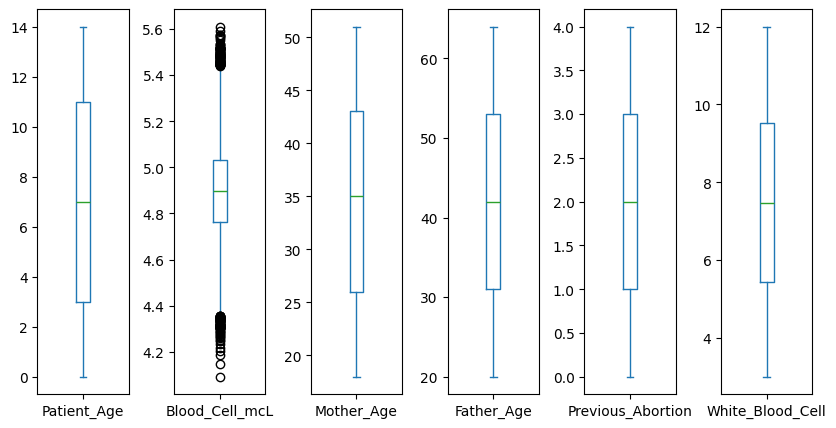

In [42]:
data[numerical].plot(kind='box', subplots=True, sharey=False, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5)

<Axes: >

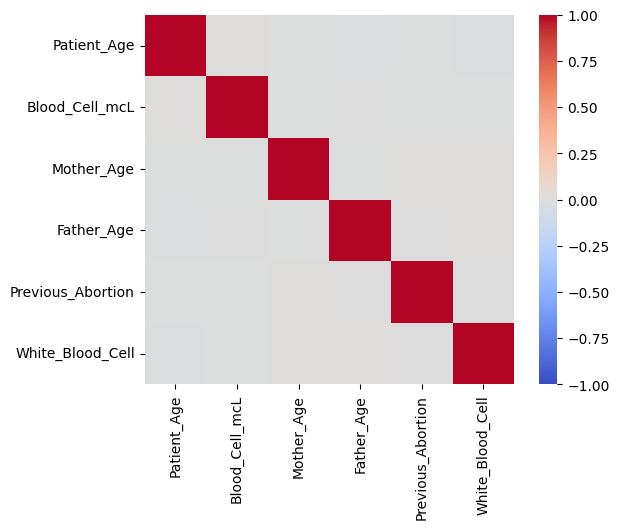

In [44]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

- As we can see there is no correlation between numerical data.

### Check and remove outliers

In [45]:
for c in numerical:
    num = data[c]
    Q1 = num.quantile(0.25)
    Q3 = num.quantile(0.75)
    IQR = Q3 - Q1
    out = num[((num < (Q1 - 1.5 * IQR)) | (num > (Q3 + 1.5 * IQR)))]
    print(f'{c : <20}', len(out))

Patient_Age          0
Blood_Cell_mcL       143
Mother_Age           0
Father_Age           0
Previous_Abortion    0
White_Blood_Cell     0


In [46]:
col = data["Blood_Cell_mcL"]
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
rows_to_drop = col[((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))].index
data.drop(rows_to_drop, inplace=True)

In [47]:
data.shape

(21940, 28)

## Fill N/A data

In [48]:
data.isna().sum()

,0
Patient_Age,1415
Genes_Mother_Side,0
Inherited_Father,305
Maternal_Gene,2795
Paternal_Gene,0
Blood_Cell_mcL,0
Mother_Age,5995
Father_Age,5947
Status,0
Respiratory_Rate_Breaths_Min,2134


In [49]:
# data["Genetic_Disorder"].mode()

# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].agg(pd.Series.mode)
# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].apply(lambda x : x.mode())
# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].transform(lambda x : x.mode())[:15]

# data.groupby(["Disorder_Subclass"])["Mother_Age"].mean()
# data.groupby(["Disorder_Subclass"])["Mother_Age"].transform('mean')

In [50]:
data.drop(columns=["Genetic_Disorder"], inplace=True)

In [51]:
for c in data.columns:
    print(f'{c : <30}', data[c].mode()[0])

Patient_Age                    4.0
Genes_Mother_Side              Yes
Inherited_Father               No
Maternal_Gene                  Yes
Paternal_Gene                  No
Blood_Cell_mcL                 4.357634000828609
Mother_Age                     23.0
Father_Age                     20.0
Status                         Alive
Respiratory_Rate_Breaths_Min   Normal (30-60)
Heart_Rates_Min                Normal
Follow_Up                      Low
Gender                         Ambiguous
Birth_Asphyxia                 Yes
Autopsy_Birth_Defect           Not applicable
Place_Birth                    Institute
Folic_Acid                     Yes
Maternal_Illness               No
Radiation_Exposure             No
Substance_Abuse                No
Assisted_Conception            Yes
History_Previous_Pregnancies   Yes
Previous_Abortion              2.0
Birth_Defects                  Singular
White_Blood_Cell               3.0
Blood_Test_Result              slightly abnormal
Disorder_Subclass    

In [ ]:
categorical.remove("Genetic_Disorder")
for c in categorical:
    if(c != "Disorder_Subclass"):
        data[c].fillna(data[c].mode()[0], inplace=True)

In [ ]:
for c in numerical:
    data[c].fillna(data.groupby(["Disorder_Subclass"])[c].transform('mean') , inplace=True)

In [54]:
data.dropna(axis=0, inplace=True)
data.isna().sum().sum()

0

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784 entries, 0 to 22082
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   19784 non-null  float64
 1   Genes_Mother_Side             19784 non-null  object 
 2   Inherited_Father              19784 non-null  object 
 3   Maternal_Gene                 19784 non-null  object 
 4   Paternal_Gene                 19784 non-null  object 
 5   Blood_Cell_mcL                19784 non-null  float64
 6   Mother_Age                    19784 non-null  float64
 7   Father_Age                    19784 non-null  float64
 8   Status                        19784 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19784 non-null  object 
 10  Heart_Rates_Min               19784 non-null  object 
 11  Follow_Up                     19784 non-null  object 
 12  Gender                        19784 non-null  object 
 13  Birth_

### Vectorization of categorical data

In [56]:
data[categorical].nunique()

,0
Genes_Mother_Side,2
Inherited_Father,2
Maternal_Gene,2
Paternal_Gene,2
Status,2
Respiratory_Rate_Breaths_Min,2
Heart_Rates_Min,2
Follow_Up,2
Gender,3
Birth_Asphyxia,2


In [57]:
binary = [c for c in categorical if len(data[c].unique()) == 2]
nonbinary = [c for c in categorical if len(data[c].unique()) > 2]
nonbinary.remove("Disorder_Subclass")
nonbinary

['Gender', 'Autopsy_Birth_Defect', 'Blood_Test_Result']

In [ ]:
for c in binary:
    n = data[c].unique()
    data[c].replace(n[0], 0, inplace=True)
    data[c].replace(n[1], 1, inplace=True)

In [59]:
data_nonbinary = pd.get_dummies(data[nonbinary])
print(data_nonbinary.columns)

Index(['Gender_Ambiguous', 'Gender_Female', 'Gender_Male',
       'Autopsy_Birth_Defect_No', 'Autopsy_Birth_Defect_Not applicable',
       'Autopsy_Birth_Defect_Yes', 'Blood_Test_Result_abnormal',
       'Blood_Test_Result_inconclusive', 'Blood_Test_Result_normal',
       'Blood_Test_Result_slightly abnormal'],
      dtype='object')


In [60]:
data_nonbinary.head()

,Gender_Ambiguous,Gender_Female,Gender_Male,Autopsy_Birth_Defect_No,Autopsy_Birth_Defect_Not applicable,Autopsy_Birth_Defect_Yes,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,True,False,False,False,True,False,False,False,False,True
1,True,False,False,False,True,False,False,False,True,False
2,True,False,False,False,True,False,False,False,True,False
3,False,False,True,True,False,False,False,True,False,False
4,False,False,True,False,True,False,False,False,False,True


### Normalize quantitative features

In [61]:
data_num = data[numerical]
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000
mean,6.946371,4.898718,34.543872,41.964605,2.002872,7.479927
std,4.178293,0.194455,8.460585,11.262538,1.343448,2.526946
min,0.000000,4.357634,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.764380,29.000000,34.000000,1.000000,5.640401
50%,7.000000,4.899377,34.476078,42.000000,2.000000,7.487254
75%,10.000000,5.032267,40.000000,50.000000,3.000000,9.283591
max,14.000000,5.439651,51.000000,64.000000,4.000000,12.000000


In [62]:
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04
mean,1.113366e-16,-2.906602e-15,6.644279e-16,5.378274e-17,-6.321043e-17,8.655520e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.662490e+00,-2.782562e+00,-1.955405e+00,-1.950236e+00,-1.490844e+00,-1.772862e+00
25%,-9.444937e-01,-6.908437e-01,-6.552587e-01,-7.071767e-01,-7.464908e-01,-7.279638e-01
50%,1.283511e-02,3.392367e-03,-8.012987e-03,3.142755e-03,-2.137433e-03,2.899695e-03
75%,7.308317e-01,6.867842e-01,6.448877e-01,7.134622e-01,7.422159e-01,7.137723e-01
max,1.688160e+00,2.781786e+00,1.945034e+00,1.956521e+00,1.486569e+00,1.788749e+00


### Merge numerical, nonbinary, binary

In [63]:
data = pd.concat((data_num, data[binary], data_nonbinary, data["Disorder_Subclass"]), axis=1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784 entries, 0 to 22082
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_Age                          19784 non-null  float64
 1   Blood_Cell_mcL                       19784 non-null  float64
 2   Mother_Age                           19784 non-null  float64
 3   Father_Age                           19784 non-null  float64
 4   Previous_Abortion                    19784 non-null  float64
 5   White_Blood_Cell                     19784 non-null  float64
 6   Genes_Mother_Side                    19784 non-null  int64  
 7   Inherited_Father                     19784 non-null  int64  
 8   Maternal_Gene                        19784 non-null  int64  
 9   Paternal_Gene                        19784 non-null  int64  
 10  Status                               19784 non-null  int64  
 11  Respiratory_Rate_Breaths_Min     

In [65]:
data["Disorder_Subclass"].value_counts()

,count
Disorder_Subclass,
Leigh syndrome,5124
Mitochondrial myopathy,4374
Cystic fibrosis,3423
Tay-Sachs,2817
Diabetes,1805
Hemochromatosis,1348
Leber's hereditary optic neuropathy,647
Alzheimer's,151
Cancer,95


## Split into train and test

In [ ]:
X = data.drop("Disorder_Subclass", axis=1) # Drop target
X = X.to_numpy()

In [ ]:
Y = data["Disorder_Subclass"]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(13848, 33) (13848, 9) (5936, 33) (5936, 9)


## Test learning algorithms

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.11313267445342917


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.11122342018568433


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 50, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.1111111111111111


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 150, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.1111111111111111


- n_neighbours=50 is optimal hyperparameter value

### Random Forest
Is used for classification problems with categorical target variables.

In [ ]:
from sklearn import ensemble

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [ ]:
err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.08649670560047919


In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train, Y_train)
err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.0877508235998802


In [ ]:
from sklearn.metrics import confusion_matrix

Y = torch.argmax(Y_test, dim=1)
Pred = torch.argmax(torch.from_numpy(rf.predict(X_test).astype(int)), dim=1)

confusion_matrix(Y, Pred)

array([[  39,    0,    0,    0,    0,    0,    0,    0,    0],
       [  27,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 849,    0,  164,    0,    0,    0,    0,    0,    0],
       [ 556,    0,    0,    7,    0,    0,    0,    0,    0],
       [ 387,    0,    0,    0,   14,    0,    0,    0,    0],
       [ 196,    0,    0,    0,    0,    0,    0,    0,    0],
       [1038,    0,    0,    0,    0,    0,  522,    1,    0],
       [ 905,    0,    0,    0,    0,    0,    0,  437,    0],
       [ 689,    0,    0,    0,    0,    0,    0,    0,  105]])

- Random Forest shows better quality than KNN

# Neural Networks with PyTorch

### Prepare data

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = torch.from_numpy(np.float32(X_train))
Y_train = torch.from_numpy(np.float32(Y_train))
X_test = torch.from_numpy(np.float32(X_test))
Y_test = torch.from_numpy(np.float32(Y_test))

n, in_dim = X_train.shape
out_dim = Y_train.shape[1]
print(n, in_dim, out_dim)

13848 33 9


## Logistic Regression

In [ ]:
from torch.nn import (Module, Sequential, Linear, ReLU, Softmax, CrossEntropyLoss)

class LogReg(Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg, self).__init__()
        self.linear = Linear(input_dim, output_dim)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


model = LogReg(in_dim, out_dim)

print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()

# model.train()
Loss = []
Acc = []

for epoch in range(20):
    for (x, y) in zip(X_train, Y_train):
        optimizer.zero_grad()
        y_ = model(x)
        loss = criterion(y_, y)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())

    correct = 0
    for (x, y) in zip(X_test, Y_test):
        correct += (torch.argmax(y) == torch.argmax(model(x)))
    Acc.append(correct/len(X_test))
    print(f'{epoch=} Loss={Loss[-1]} Accuracy={Acc[-1]}')


LogReg(
  (linear): Linear(in_features=33, out_features=9, bias=True)
)
epoch=0 Loss=2.2586679458618164 Accuracy=0.24646227061748505
epoch=1 Loss=2.1355788707733154 Accuracy=0.25286388397216797
epoch=2 Loss=2.061288833618164 Accuracy=0.25387465953826904
epoch=3 Loss=2.0178449153900146 Accuracy=0.25539082288742065
epoch=4 Loss=1.9912307262420654 Accuracy=0.2548854351043701
epoch=5 Loss=1.9741547107696533 Accuracy=0.2555592954158783
epoch=6 Loss=1.9628105163574219 Accuracy=0.2555592954158783
epoch=7 Loss=1.9550861120224 Accuracy=0.2555592954158783
epoch=8 Loss=1.9497326612472534 Accuracy=0.25690701603889465
epoch=9 Loss=1.945969820022583 Accuracy=0.25724393129348755
epoch=10 Loss=1.9432871341705322 Accuracy=0.2570754587650299
epoch=11 Loss=1.9413384199142456 Accuracy=0.256738543510437
epoch=12 Loss=1.9398822784423828 Accuracy=0.25690701603889465
epoch=13 Loss=1.938748836517334 Accuracy=0.2564016282558441
epoch=14 Loss=1.9378175735473633 Accuracy=0.256738543510437
epoch=15 Loss=1.93700170

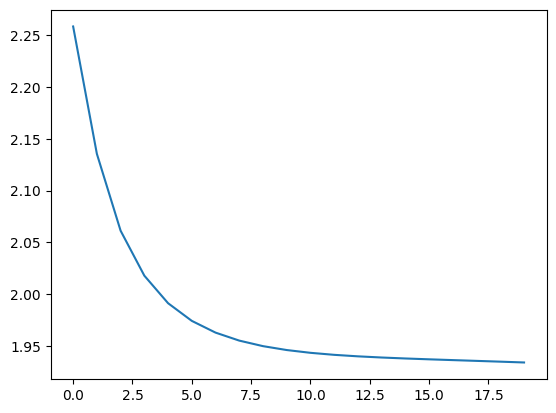

In [ ]:
plt.plot(Loss)

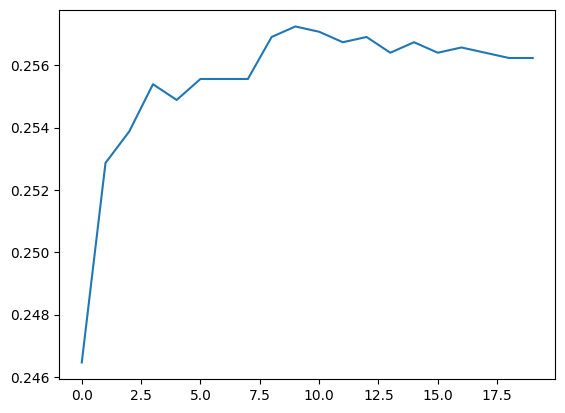

In [ ]:
plt.plot(Acc)

In [ ]:
from sklearn.metrics import confusion_matrix

Y = []
Pred = []
for (x, y) in zip(X_test, Y_test):
    Y.append(torch.argmax(y))
    Pred.append(torch.argmax(model(x)))

confusion_matrix(Y, Pred)

array([[   0,    0,    0,    0,    0,    0,   39,    0,    0],
       [   0,    0,    0,    0,    0,    0,   22,    5,    0],
       [   0,    0,    0,    0,    0,    0,  954,   59,    0],
       [   0,    0,    0,    0,    0,    0,  540,   23,    0],
       [   0,    0,    0,    0,    0,    0,  358,   43,    0],
       [   0,    0,    0,    0,    0,    0,  187,    9,    0],
       [   0,    0,    0,    0,    0,    0, 1431,  130,    0],
       [   0,    0,    0,    0,    0,    0, 1252,   90,    0],
       [   0,    0,    0,    0,    0,    0,  731,   63,    0]])

### FFN

In [ ]:
from torch.nn import (Module, Sequential, Linear, ReLU, Sigmoid, Softmax, CrossEntropyLoss)

class FFN(Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(FFN, self).__init__()
        self.ffn = Sequential(
            Linear(input_dim, hidden_dim),
            ReLU(),
            Linear(hidden_dim, output_dim),
            Softmax(dim=0),
        )

    def forward(self, x):
        return self.ffn(x)

def train(mid_dim):
    print(f'{mid_dim=}')
    model = FFN(in_dim, out_dim, mid_dim)

    criterion = CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    Loss = []
    Acc = []

    for epoch in range(10):
        for (x, y) in zip(X_train, Y_train):
            optimizer.zero_grad()
            y_ = model(x)
            loss = criterion(y_, y)
            loss.backward()
            optimizer.step()
        Loss.append(loss.item())

        correct = 0
        for (x, y) in zip(X_test, Y_test):
            correct += (torch.argmax(y) == torch.argmax(model(x)))
        Acc.append(correct/len(X_test))
        print(f'{epoch=} Loss={Loss[-1]} Accuracy={Acc[-1]}')

    return max(Acc)

In [ ]:
train(5)

mid_dim=5
epoch=0 Loss=2.3010194301605225 Accuracy=0.2607816755771637
epoch=1 Loss=2.328748941421509 Accuracy=0.2629716992378235
epoch=2 Loss=2.3325130939483643 Accuracy=0.2629716992378235
epoch=3 Loss=2.333252429962158 Accuracy=0.2629716992378235
epoch=4 Loss=2.333345651626587 Accuracy=0.2629716992378235
epoch=5 Loss=2.333247661590576 Accuracy=0.2629716992378235
epoch=6 Loss=2.3330636024475098 Accuracy=0.2629716992378235
epoch=7 Loss=2.33284330368042 Accuracy=0.26431941986083984
epoch=8 Loss=2.332630157470703 Accuracy=0.2622978389263153
epoch=9 Loss=2.3324434757232666 Accuracy=0.26095014810562134


tensor(0.2643)

In [ ]:
train(50)

mid_dim=50
epoch=0 Loss=2.3312275409698486 Accuracy=0.2611185908317566
epoch=1 Loss=2.331744909286499 Accuracy=0.2611185908317566
epoch=2 Loss=2.330437183380127 Accuracy=0.2619609236717224
epoch=3 Loss=2.3297371864318848 Accuracy=0.26836252212524414
epoch=4 Loss=2.329911231994629 Accuracy=0.2734164297580719
epoch=5 Loss=2.330198287963867 Accuracy=0.2756064832210541
epoch=6 Loss=2.330409288406372 Accuracy=0.27543801069259644
epoch=7 Loss=2.3305413722991943 Accuracy=0.2740902900695801
epoch=8 Loss=2.3306498527526855 Accuracy=0.27476415038108826
epoch=9 Loss=2.3307368755340576 Accuracy=0.2752695381641388


tensor(0.2756)

In [ ]:
train(150)

mid_dim=150
epoch=0 Loss=2.331000804901123 Accuracy=0.2675202190876007
epoch=1 Loss=2.329530715942383 Accuracy=0.26212936639785767
epoch=2 Loss=2.3286654949188232 Accuracy=0.26465633511543274
epoch=3 Loss=2.3294355869293213 Accuracy=0.2703841030597687
epoch=4 Loss=2.3299903869628906 Accuracy=0.2715633511543274
epoch=5 Loss=2.3303370475769043 Accuracy=0.27139487862586975
epoch=6 Loss=2.3306636810302734 Accuracy=0.27105796337127686
epoch=7 Loss=2.3310251235961914 Accuracy=0.2700471580028534
epoch=8 Loss=2.3316307067871094 Accuracy=0.2703841030597687
epoch=9 Loss=2.3322911262512207 Accuracy=0.26954177021980286


tensor(0.2716)

### Results

FFN with one hidden layer acts comparable to the Logistic Regression model regardless of the number of neurons in the hidden layer.

This might shows that data requires deep analysis and more time for training. Also classes are highly unbalanced (see data["Disorder_Subclass"].value_counts() ). To fix it oversampling can be used.

Adam optimizer with leaning rate 0.0001 leads to growth of Loss which is justified by instability of the method.